In [24]:
import collections
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import powerlaw
from scipy.stats import linregress

In [2]:
df = pd.read_csv('../resources/data/initial_users_data_lucianobajr.csv', encoding='utf-8')

In [12]:
df.head()

,Nome de usuário,ID,AvatarURL,GravatarID,URL,HTMLURL,FollowersURL,FollowingURL,GistsURL,StarredURL,...,Hireable,Bio,PublicRepos,PublicGists,Followers,Following,CreatedAt,UpdatedAt,Following Users,Followers Users
0,otaviolemos,1864126,https://avatars.githubusercontent.com/u/186412...,NaN,https://api.github.com/users/otaviolemos,https://github.com/otaviolemos,https://api.github.com/users/otaviolemos/follo...,https://api.github.com/users/otaviolemos/follo...,https://api.github.com/users/otaviolemos/gists...,https://api.github.com/users/otaviolemos/starr...,...,NaN,Associate Professor @ ICT-UNIFESP.\r\nSeeker o...,35,4,1223,1,2012-06-18 18:49:09+00:00,2023-10-13 12:35:55+00:00,norvig,"berlotto, eugeniomiro, brasten, maykon, cassio..."
1,gfviegas,6178801,https://avatars.githubusercontent.com/u/617880...,NaN,https://api.github.com/users/gfviegas,https://github.com/gfviegas,https://api.github.com/users/gfviegas/followers,https://api.github.com/users/gfviegas/followin...,https://api.github.com/users/gfviegas/gists{/g...,https://api.github.com/users/gfviegas/starred{...,...,NaN,Head of Technology at Hubs Contabilidade.,87,11,82,80,2013-12-13 13:53:47+00:00,2023-09-28 11:26:20+00:00,"josevalim, luizdamim, flaviovdf, denislins, sa...","emfol, phinfonet, marlonassuncao, emersonpc, t..."
2,rodrigobranas,7491283,https://avatars.githubusercontent.com/u/749128...,NaN,https://api.github.com/users/rodrigobranas,https://github.com/rodrigobranas,https://api.github.com/users/rodrigobranas/fol...,https://api.github.com/users/rodrigobranas/fol...,https://api.github.com/users/rodrigobranas/gis...,https://api.github.com/users/rodrigobranas/sta...,...,NaN,"Software Architect, Professor, Author and Speaker",206,2,5823,3,2014-05-05 17:15:18+00:00,2023-05-15 13:52:21+00:00,"felipefialho, NandoMB, MateusMFX","charlenopires, danieldocki, souzaonofre, joels..."
3,guiaguiar27,17009319,https://avatars.githubusercontent.com/u/170093...,NaN,https://api.github.com/users/guiaguiar27,https://github.com/guiaguiar27,https://api.github.com/users/guiaguiar27/follo...,https://api.github.com/users/guiaguiar27/follo...,https://api.github.com/users/guiaguiar27/gists...,https://api.github.com/users/guiaguiar27/starr...,...,NaN,Computer Science student,41,23,40,65,2016-02-01 16:26:42+00:00,2023-09-29 14:00:54+00:00,"greut, geohot, pavelmaca, flaviovdf, adamdunke...","esin, sw3luke, gfviegas, canesche, badain, vin..."
4,lazarobodevan,23053276,https://avatars.githubusercontent.com/u/230532...,NaN,https://api.github.com/users/lazarobodevan,https://github.com/lazarobodevan,https://api.github.com/users/lazarobodevan/fol...,https://api.github.com/users/lazarobodevan/fol...,https://api.github.com/users/lazarobodevan/gis...,https://api.github.com/users/lazarobodevan/sta...,...,NaN,Computer science student at the Federal Univer...,33,0,18,15,2016-10-25 11:30:58+00:00,2023-08-17 18:37:13+00:00,"jamesmontemagno, adrianomqsmts, GuilhermeCorre...","piface314, adrianomqsmts, GuilhermeCorreaSouza..."


---------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
# Crie um grafo direcionado no NetworkX
G = nx.DiGraph()

# Adicione nós para os usuários
for _, row in df.iterrows():
    G.add_node(row["Nome de usuário"])
    
    # Adicione as relações de seguindo (following)
    following_users = str(row["Following Users"]).split(", ")
    for following_user in following_users:
        if following_user.strip():  # Verifique se a string não está vazia
            G.add_edge(row["Nome de usuário"], following_user)
        
    # Adicione as relações de seguidores (followers)
    followers_users = str(row["Followers Users"]).split(", ")
    for follower_user in followers_users:
        if follower_user.strip():  # Verifique se a string não está vazia
            G.add_edge(follower_user, row["Nome de usuário"])

# Análise da Estrutura da rede

A rede analisada refere-se à rede de usuários do GitHub, uma plataforma de desenvolvimento colaborativo de software. Nesta rede, os "nós" representam os usuários individuais do GitHub, cada um com um perfil que inclui informações pessoais, repositórios de código-fonte, atividades, seguidores e usuários que estão seguindo. Os "arestas" na rede representam as conexões entre os usuários, que podem ser de dois tipos:

Seguindo (`Following`): Uma aresta entre o usuário A e o usuário B indica que o usuário A está seguindo o usuário B.

Seguidores (`Followers`): Uma aresta entre o usuário B e o usuário A indica que o usuário B está seguindo o usuário A.

Em resumo, os "nós" são os perfis de usuários individuais no GitHub, e as "arestas" representam as conexões de "seguindo" e "seguidores" entre esses usuários. A rede é usada para rastrear o relacionamento de seguidores e seguindo de usuários, bem como para facilitar a colaboração e a descoberta de projetos de código aberto e repositórios interessantes. A análise dessa rede pode fornecer insights sobre a interação e a influência dos usuários na plataforma do GitHub.

Abaixo Temos o números de nós e arestas do grafo

In [5]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f'numero de nós {num_nodes}')
print(f'numero de arestas {num_edges}')

numero de nós 8100
numero de arestas 9868


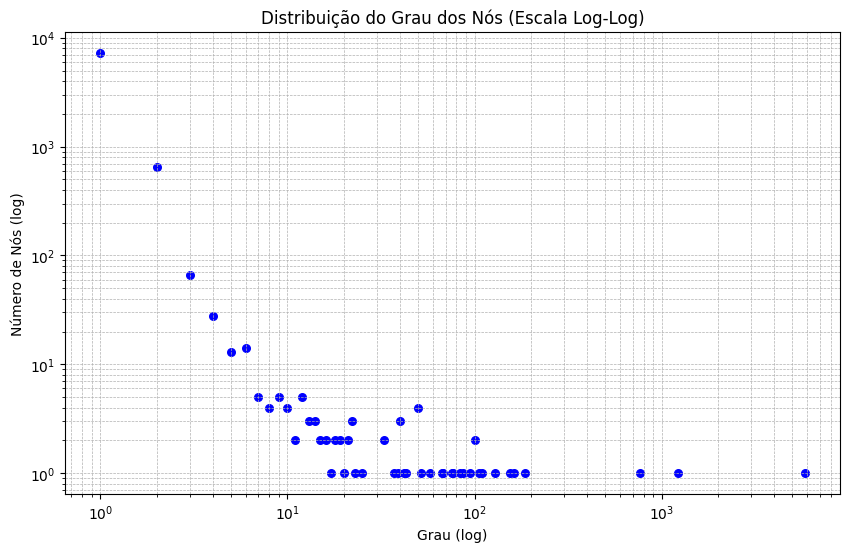

In [20]:
# Calcule os graus dos nós
degree_sequence = [d for n, d in G.degree()]

# Calcule a distribuição do grau
degree_counts = dict(zip(*np.unique(degree_sequence, return_counts=True)))

# Prepare os dados para o gráfico
degrees, counts = zip(*degree_counts.items())

# Plote a distribuição do grau dos nós em escala log-log
plt.figure(figsize=(10, 6))
plt.scatter(degrees, counts, color='b', marker='o', s=30)
plt.xscale('log')
plt.yscale('log')
plt.title("Distribuição do Grau dos Nós (Escala Log-Log)")
plt.xlabel("Grau (log)")
plt.ylabel("Número de Nós (log)")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

Calculating best minimal value for power law fit


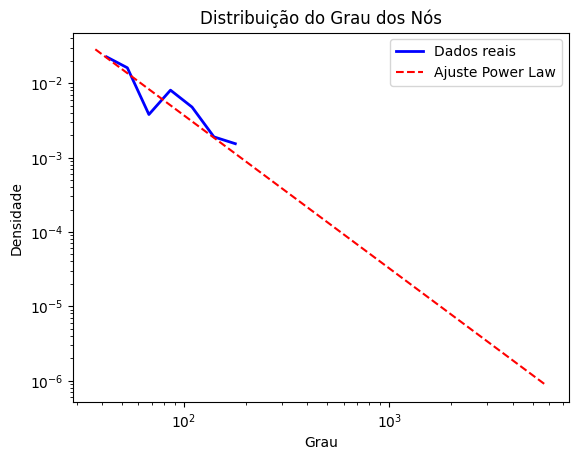

Alpha (exponente da Power Law): 2.0568212120344893
Xmin (valor mínimo): 37.0


In [17]:
# Calcule os graus dos nós
degree_sequence = [d for n, d in G.degree()]

# Crie um objeto PowerLaw a partir dos dados
fit = powerlaw.Fit(degree_sequence)

# Plote a distribuição do grau
fit.plot_pdf(color='b', linewidth=2)
plt.title("Distribuição do Grau dos Nós")
plt.xlabel("Grau")
plt.ylabel("Densidade")

# Plote o ajuste da Power Law
fit.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca())
plt.legend(['Dados reais', 'Ajuste Power Law'])
plt.show()

# Exiba os parâmetros estimados da Power Law
print("Alpha (exponente da Power Law):", fit.power_law.alpha)
print("Xmin (valor mínimo):", fit.power_law.xmin)

O valor do expoente da Power Law (alpha) que você obteve é 2.0568, e o valor mínimo (Xmin) é 37.0. Agora, para responder à pergunta sobre se a curva parece uma Power Law, você pode considerar o seguinte:

1. O valor de alpha: Um valor próximo de 2 é um indicativo de que a distribuição do grau dos nós segue uma Power Law. Em muitas redes do mundo real, um valor de alpha em torno de 2 é comum para a distribuição de grau.

2. O valor de Xmin: O valor mínimo (Xmin) indica o ponto a partir do qual a distribuição segue uma Power Law. Neste caso, um valor de 37.0 significa que a distribuição começa a seguir a Power Law a partir desse grau. Se o valor de Xmin for próximo de 1, isso sugere que a distribuição segue uma Power Law desde o início.

Com base nos valores que você obteve, é razoável afirmar que a distribuição do grau dos nós da sua rede do GitHub se assemelha a uma Power Law, uma vez que o valor de alpha está próximo de 2. No entanto, é importante lembrar que a análise estatística é uma abordagem indicativa, e outros fatores podem influenciar a distribuição dos graus. Portanto, é apropriado dizer que a curva parece seguir uma Power Law, mas isso não é uma conclusão definitiva.

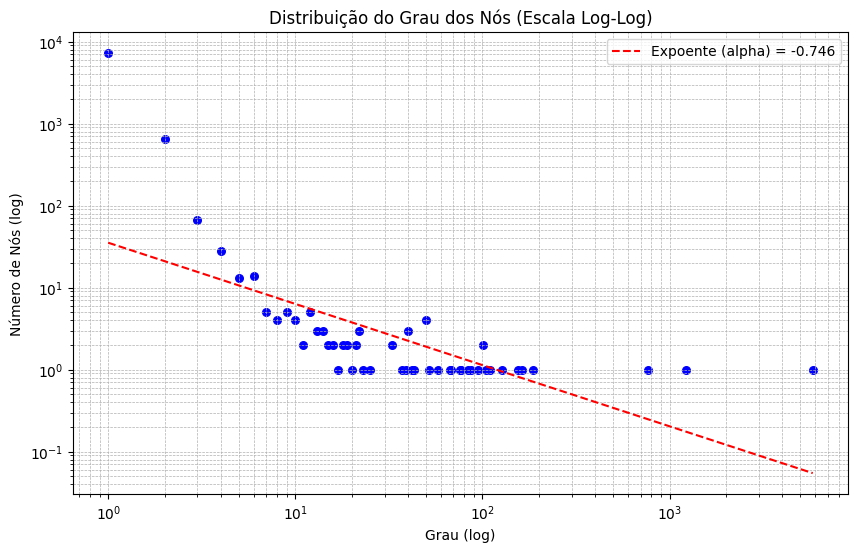

Coeficiente Angular (alpha): -0.746


In [25]:
# Calcule os graus dos nós
degree_sequence = [d for n, d in G.degree()]

# Calcule a distribuição do grau
degree_counts = dict(zip(*np.unique(degree_sequence, return_counts=True)))

# Prepare os dados para o gráfico
degrees, counts = zip(*degree_counts.items())

# Realize uma regressão linear no espaço log-log
log_degrees = np.log(degrees)
log_counts = np.log(counts)
slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_counts)

# Plote a distribuição do grau dos nós em escala log-log
plt.figure(figsize=(10, 6))
plt.scatter(degrees, counts, color='b', marker='o', s=30)
plt.xscale('log')
plt.yscale('log')
plt.title("Distribuição do Grau dos Nós (Escala Log-Log)")
plt.xlabel("Grau (log)")
plt.ylabel("Número de Nós (log)")
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Plote a reta da regressão linear
plt.plot(degrees, np.exp(intercept) * degrees**slope, 'r--', label=f'Expoente (alpha) = {slope:.3f}')
plt.legend()

plt.show()

# Exiba o coeficiente angular da reta (estimativa de alpha)
print(f"Coeficiente Angular (alpha): {slope:.3f}")

A primeira análise indicou um valor de alpha próximo a 2 (2.0568) e um valor de Xmin (37.0), o que sugeriria uma distribuição que se assemelha a uma Power Law.

A segunda análise, com o coeficiente angular (alpha) de -0.746 na regressão linear, sugere que a distribuição do grau não se assemelha a uma Power Law.

Dada essa inconsistência, a interpretação correta depende do método de análise que você considera mais apropriado e se você está disposto a confiar mais na estimativa do coeficiente alpha a partir da regressão linear ou da análise direta da distribuição. Cada método tem suas limitações e suposições subjacentes, e pode haver diferentes explicações para os resultados discrepantes.

In [29]:
# Calcule os graus dos nós
degree_sequence = [d for n, d in G.degree()]

# Calcule o grau médio
grau_medio = sum(degree_sequence) / len(degree_sequence)

print("Grau Médio do Grafo:", grau_medio)

Grau Médio do Grafo: 2.436543209876543


O grau médio do seu grafo é de aproximadamente 2.44. Isso significa que, em média, cada nó na rede está conectado a cerca de 2.44 outros nós, o que é uma métrica importante para entender a conectividade média na rede. Essa informação pode ser útil na análise e caracterização da estrutura da sua rede.

------------------------------------------------------------------

In [37]:
# Calcule o número de componentes do grafo
num_componentes = nx.number_weakly_connected_components(G)

print("Número de Componentes do Grafo:", num_componentes)


Número de Componentes do Grafo: 1


In [39]:
# Calcule os componentes fortemente conectados (ou fracamente conectados, dependendo do tipo de grafo)
if nx.is_directed(G):
    num_componentes = nx.number_weakly_connected_components(G)
else:
    num_componentes = nx.number_connected_components(G)

# Verifique se há mais de um componente
if num_componentes > 1:
    # Calcule os tamanhos dos componentes
    tamanhos_componentes = [len(componente) for componente in componentes]

    # Plote a distribuição dos tamanhos dos componentes
    plt.figure(figsize=(10, 6))
    plt.hist(tamanhos_componentes, bins=20, color='b', alpha=0.7)
    plt.title("Distribuição do Tamanho dos Componentes")
    plt.xlabel("Tamanho dos Componentes")
    plt.ylabel("Número de Componentes")
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("O grafo possui apenas um componente.")

O grafo possui apenas um componente.


---------------------------------------------------------------------------------------